In [61]:
# Data Analysis & Data Wrangling
import numpy as np
import pandas as pd

# Algorithm for statistical analysis - like ANOVA, normality and variance
import scipy.stats as stats
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Filtering warning message
from warnings import filterwarnings
filterwarnings("ignore")



In [6]:
df = pd.read_csv('Hair Salon.csv')

In [7]:
df.head()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1


# ***2.1 Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented***

In [9]:
df.columns

Index(['ID', 'ProdQual', 'Ecom', 'TechSup', 'CompRes', 'Advertising',
       'ProdLine', 'SalesFImage', 'ComPricing', 'WartyClaim', 'OrdBilling',
       'DelSpeed', 'Satisfaction'],
      dtype='object')

In [ ]:
%matplotlib inline
import numpy as np
import scipy.stats as st
from sci_analysis import analyze


In [ ]:

for column in df.columns:
    if df[column].dtype != 'object':
        print("Distribution of " + column)
        analyze(df[column])        

In [ ]:
from sci_analysis import analyze

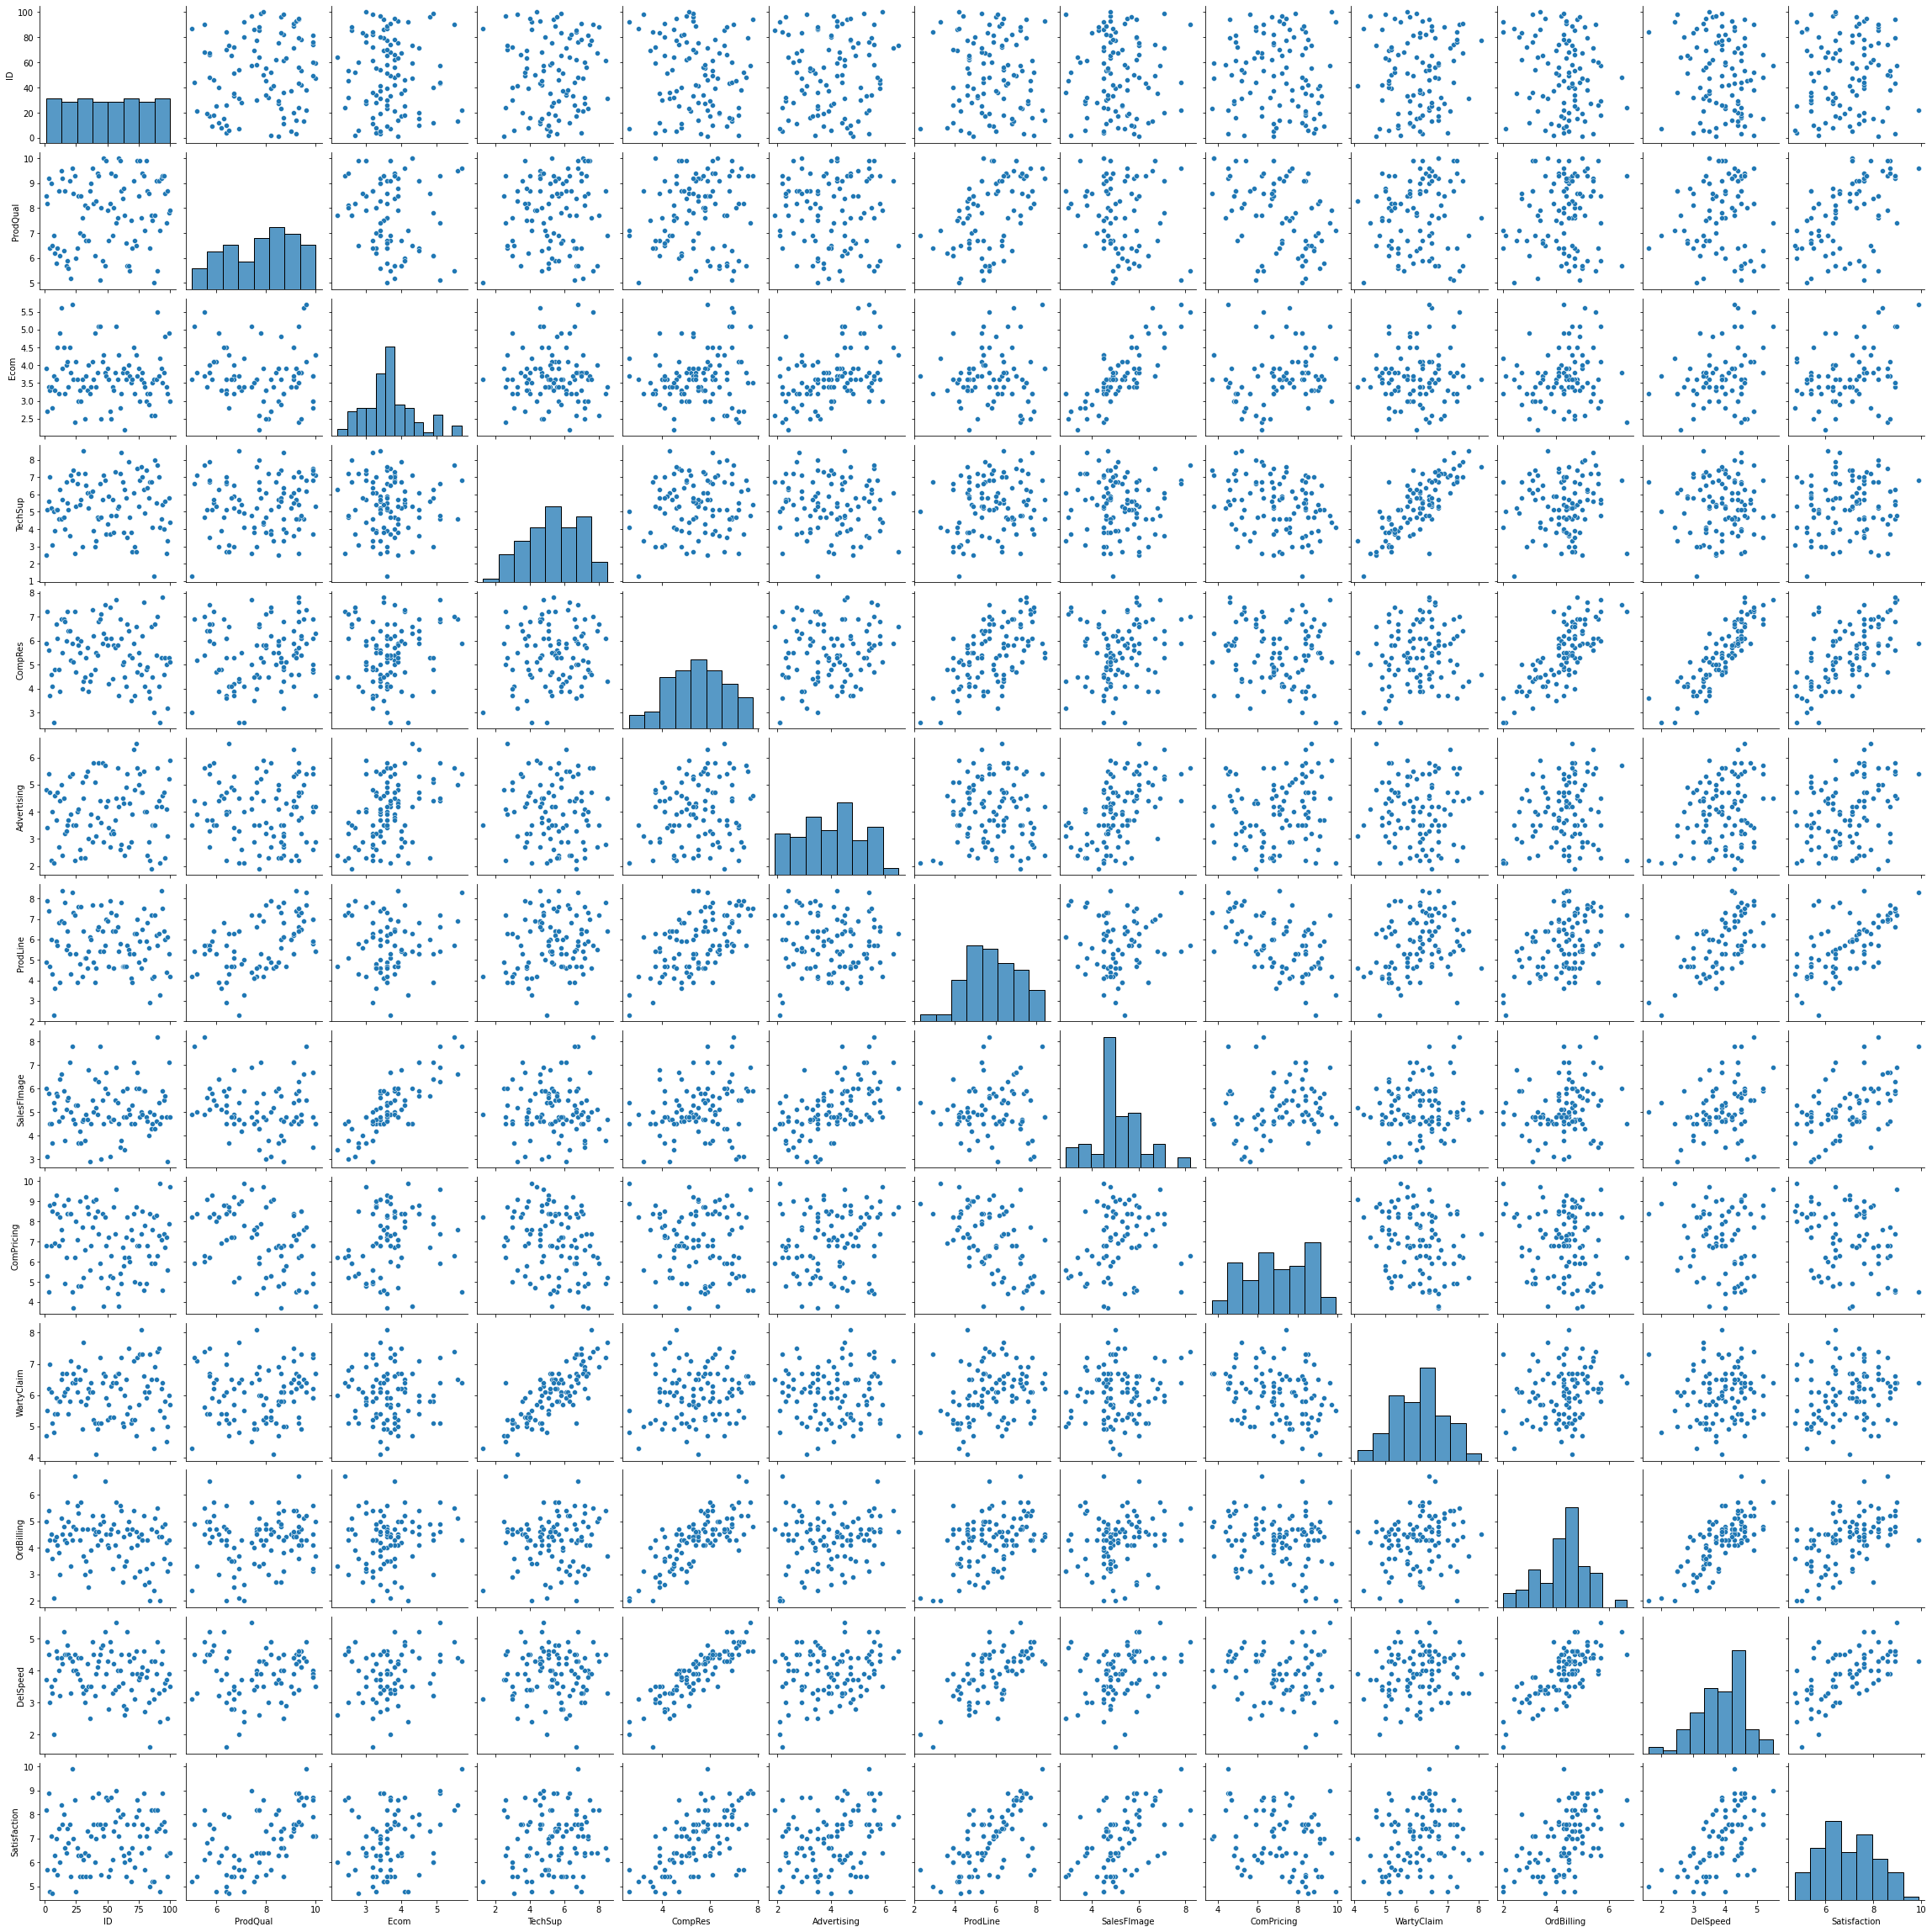

In [62]:
# Multivariate


sns.pairplot(df)
plt.show();


In [75]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

13

In [76]:
## correlation matrix
df_Corr = df_num.corr(method='pearson')
df_Corr

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
ID,1.000000,0.145774,-0.046173,0.031838,-0.144322,0.073129,-0.048641,0.013848,-0.063007,0.058592,-0.178352,-0.172134,0.061143
ProdQual,0.145774,1.000000,-0.137163,0.095600,0.106370,-0.053473,0.477493,-0.151813,-0.401282,0.088312,0.104303,0.027718,0.486325
Ecom,-0.046173,-0.137163,1.000000,0.000867,0.140179,0.429891,-0.052688,0.791544,0.229462,0.051898,0.156147,0.191636,0.282745
TechSup,0.031838,0.095600,0.000867,1.000000,0.096657,-0.062870,0.192625,0.016991,-0.270787,0.797168,0.080102,0.025441,0.112597
CompRes,-0.144322,0.106370,0.140179,0.096657,1.000000,0.196917,0.561417,0.229752,-0.127954,0.140408,0.756869,0.865092,0.603263
Advertising,0.073129,-0.053473,0.429891,-0.062870,0.196917,1.000000,-0.011551,0.542204,0.134217,0.010792,0.184236,0.275863,0.304669
ProdLine,-0.048641,0.477493,-0.052688,0.192625,0.561417,-0.011551,1.000000,-0.061316,-0.494948,0.273078,0.424408,0.601850,0.550546
SalesFImage,0.013848,-0.151813,0.791544,0.016991,0.229752,0.542204,-0.061316,1.000000,0.264597,0.107455,0.195127,0.271551,0.500205
ComPricing,-0.063007,-0.401282,0.229462,-0.270787,-0.127954,0.134217,-0.494948,0.264597,1.000000,-0.244986,-0.114567,-0.072872,-0.208296
WartyClaim,0.058592,0.088312,0.051898,0.797168,0.140408,0.010792,0.273078,0.107455,-0.244986,1.000000,0.197065,0.109395,0.177545


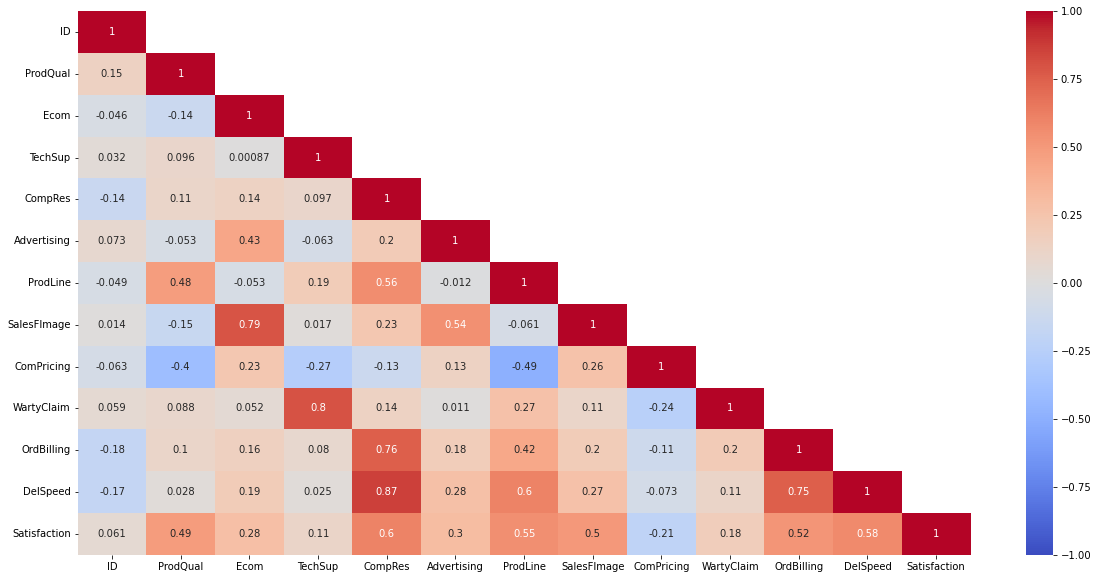

In [77]:
## correlation map
plt.figure(figsize=(20 ,10))
mask = np.array(df_Corr)
mask[np.tril_indices_from(mask)] =False
sns.heatmap(data =df_Corr, annot =True, mask =mask,vmax =1, vmin=-1, cmap ='coolwarm');

# ***2.2 Scale the variables and write the inference for using the type of scaling function for this case study.***

Statistical tests to be done before performing PCA

Bartletts Test of Sphericity:
Bartlett's test of sphericity tests the hypothesis that the variables are uncorrelated in the population.

H0: All variables in the data are uncorrelated Ha: At least one pair of variables in the data are correlated If the null hypothesis cannot be rejected, then PCA is not advisable.

If the p-value is small, then we can reject the null hypothesis and agree that there is atleast one pair of vairbales in the data wihich are correlated hence PCA is recommended.


In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_num_scaled)
p_value

KMO Test

The Kaiser-Meyer-Olkin (KMO) - measure of sampling adequacy (MSA) is an index used to examine how appropriate PCA is.

Generally, if MSA is less than 0.5, PCA is not recommended, since no reduction is expected. On the other hand, MSA > 0.7 is expected to provide a considerable reduction is the dimension and extraction of meaningful components

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_num_scaled)
kmo_model

In [79]:
## Scaling the data
from scipy.stats import zscore
df_num_scaled=df_num.apply(zscore)
df_num_scaled.head()


,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,-1.714816,0.496660,0.327114,-1.881421,0.380922,0.704543,-0.691530,0.821973,-0.113185,-1.646582,0.781230,-0.254531,1.081067
1,-1.680173,0.280721,-1.394538,-0.174023,1.462141,-0.544014,1.600835,-1.896068,-1.088915,-0.665744,-0.409009,1.387605,-1.027098
2,-1.645531,1.000518,-0.390241,0.154322,0.131410,1.239639,1.218774,0.634522,-1.609304,0.192489,1.214044,0.840226,1.671354
3,-1.610888,-1.014914,-0.533712,1.073690,-1.448834,0.615361,-0.844354,-0.583910,1.187789,1.173327,0.023805,-1.212443,-1.786038
4,-1.576245,0.856559,-0.390241,-0.108354,-0.700298,-1.614207,0.149004,-0.583910,-0.113185,0.069885,0.240212,-0.528220,0.153474


# ***2.3 Comment on the comparison between covariance and the correlation matrix after scaling.***


In [80]:
# Step 1- Create the covariance Matrix
cov_matrix = np.cov(df_num_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.01010101e+00  1.47246863e-01 -4.66398292e-02  3.21596548e-02
  -1.45780253e-01  7.38679326e-02 -4.91322907e-02  1.39879563e-02
  -6.36432983e-02  5.91842408e-02 -1.80153686e-01 -1.73872596e-01
   6.17605408e-02]
 [ 1.47246863e-01  1.01010101e+00 -1.38548704e-01  9.65661154e-02
   1.07444445e-01 -5.40132667e-02  4.82316579e-01 -1.53346338e-01
  -4.05335236e-01  8.92043497e-02  1.05356640e-01  2.79979825e-02
   4.91237372e-01]
 [-4.66398292e-02 -1.38548704e-01  1.01010101e+00  8.75544162e-04
   1.41595213e-01  4.34233041e-01 -5.32200387e-02  7.99539102e-01
   2.31780203e-01  5.24224157e-02  1.57724577e-01  1.93571786e-01
   2.85601025e-01]
 [ 3.21596548e-02  9.65661154e-02  8.75544162e-04  1.01010101e+00
   9.76329270e-02 -6.35051180e-02  1.94571168e-01  1.71621612e-02
  -2.73521901e-01  8.05220127e-01  8.09109340e-02  2.56976702e-02
   1.13734524e-01]
 [-1.45780253e-01  1.07444445e-01  1.41595213e-01  9.76329270e-02
   1.01010101e+00  1.98905906e-01  5.6708783

In [81]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('\n')
print('Eigen Vectors \n %s', eig_vecs)


 Eigen Values 
 %s [4.09031163 2.58246009 1.74408311 1.38449513 0.84530284 0.63737703
 0.55277881 0.40687424 0.32136047 0.23782883 0.14469341 0.08361313
 0.10013442]


Eigen Vectors 
 %s [[ 0.04659362  0.04983935 -0.23101384 -0.49737305 -0.77967247 -0.11581052
   0.2434289   0.00670863  0.10531516 -0.03330521  0.03642261  0.02144534
  -0.00261414]
 [-0.15527921  0.31871546  0.00350694 -0.52458938  0.30438026 -0.26205579
  -0.40025604  0.12242084  0.29399737 -0.18687338 -0.2077462   0.21495202
  -0.22775251]
 [-0.16649956 -0.43719256 -0.24857742 -0.08627072  0.30202119 -0.09075031
   0.4135531   0.0069788   0.51442042 -0.23131479 -0.02350541 -0.34920787
   0.02731935]
 [-0.12357735  0.24176757 -0.56970117  0.29368824 -0.01164363 -0.05256564
  -0.12809222 -0.01430496 -0.10903036 -0.53917654  0.42537132  0.11007793
   0.01723457]
 [-0.42372779 -0.00333435  0.21422033  0.17225577 -0.20503738 -0.05876359
   0.03792792 -0.00299504 -0.13815804 -0.44253679 -0.58002662  0.05228422
   0.3792746

# ***2.4 Check the dataset for outliers before and after scaling. Draw your inferences from this exercise***

In [28]:
## Scaling the data
from scipy.stats import zscore
df_num_scaled=df_num.apply(zscore)
df_num_scaled.head()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,-1.714816,0.496660,0.327114,-1.881421,0.380922,0.704543,-0.691530,0.821973,-0.113185,-1.646582,0.781230,-0.254531,1.081067
1,-1.680173,0.280721,-1.394538,-0.174023,1.462141,-0.544014,1.600835,-1.896068,-1.088915,-0.665744,-0.409009,1.387605,-1.027098
2,-1.645531,1.000518,-0.390241,0.154322,0.131410,1.239639,1.218774,0.634522,-1.609304,0.192489,1.214044,0.840226,1.671354
3,-1.610888,-1.014914,-0.533712,1.073690,-1.448834,0.615361,-0.844354,-0.583910,1.187789,1.173327,0.023805,-1.212443,-1.786038
4,-1.576245,0.856559,-0.390241,-0.108354,-0.700298,-1.614207,0.149004,-0.583910,-0.113185,0.069885,0.240212,-0.528220,0.153474


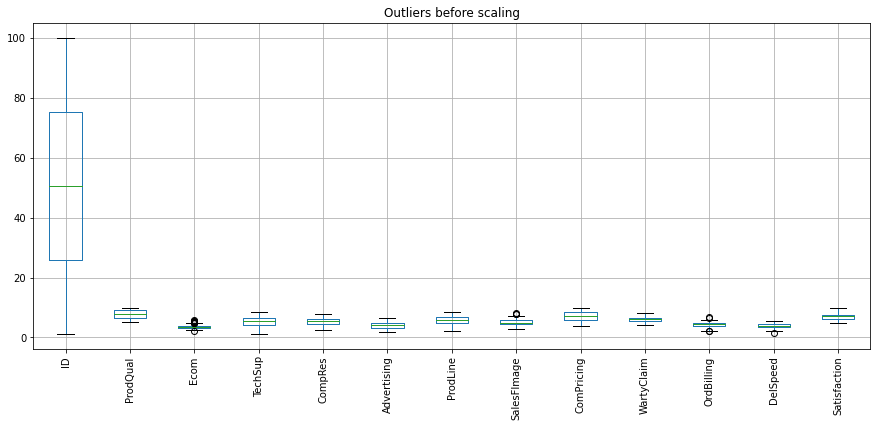

In [29]:
## checking for outlier in data before scaling
df_num.boxplot(figsize=(15,6))
plt.xticks(rotation=90)
plt.title('Outliers before Scaling')
plt.show()

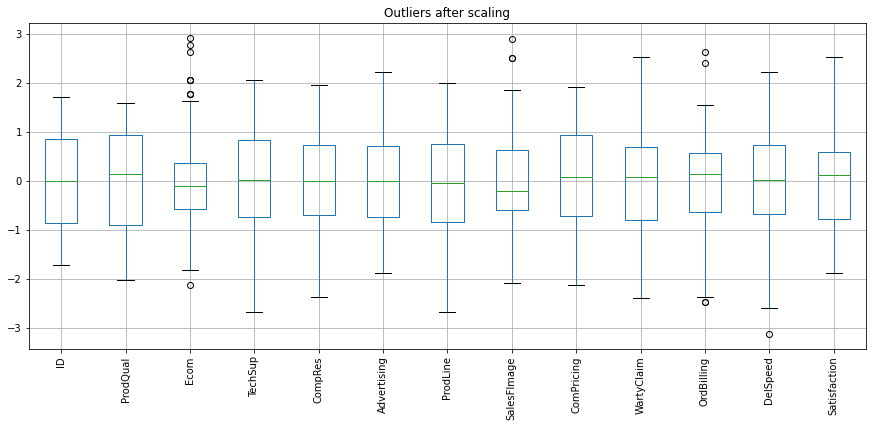

In [30]:
## checking for outlier in data after scaling
df_num_scaled.boxplot(figsize=(15,6))
plt.xticks(rotation=90)
plt.title('Outliers after Scaling')
plt.show()

# ***2.5 Build the covariance matrix, eigenvalues and eigenvector.***

In [34]:
# The Covariance matrix for Eigenvector and Eigenvalues

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('\n')
print('Eigen Vectors \n %s', eig_vecs)


 Eigen Values 
 %s [4.09031163 2.58246009 1.74408311 1.38449513 0.84530284 0.63737703
 0.55277881 0.40687424 0.32136047 0.23782883 0.14469341 0.08361313
 0.10013442]


Eigen Vectors 
 %s [[ 0.04659362  0.04983935 -0.23101384 -0.49737305 -0.77967247 -0.11581052
   0.2434289   0.00670863  0.10531516 -0.03330521  0.03642261  0.02144534
  -0.00261414]
 [-0.15527921  0.31871546  0.00350694 -0.52458938  0.30438026 -0.26205579
  -0.40025604  0.12242084  0.29399737 -0.18687338 -0.2077462   0.21495202
  -0.22775251]
 [-0.16649956 -0.43719256 -0.24857742 -0.08627072  0.30202119 -0.09075031
   0.4135531   0.0069788   0.51442042 -0.23131479 -0.02350541 -0.34920787
   0.02731935]
 [-0.12357735  0.24176757 -0.56970117  0.29368824 -0.01164363 -0.05256564
  -0.12809222 -0.01430496 -0.10903036 -0.53917654  0.42537132  0.11007793
   0.01723457]
 [-0.42372779 -0.00333435  0.21422033  0.17225577 -0.20503738 -0.05876359
   0.03792792 -0.00299504 -0.13815804 -0.44253679 -0.58002662  0.05228422
   0.3792746

# ***2.6 Write the explicit form of the first PC (in terms of Eigen Vectors)***

In [ ]:
## print('The Linear eq of 1st component: ')
for i in range(0,df_num_scaled.shape[1]):
    df=pca
    print('{} * {}'.format(np.round([0][i],2),df_num_scaled.columns[i]),end='  ')
    

# ***2.7 Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate? Perform PCA and export the data of the Principal Component scores into a data frame.***

In [44]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 31.14929626  50.81572309  64.09758676  74.64104968  81.07835592
  85.93222712  90.14185037  93.24035419  95.68763779  97.49879577
  98.60069174  99.36325388 100.        ]


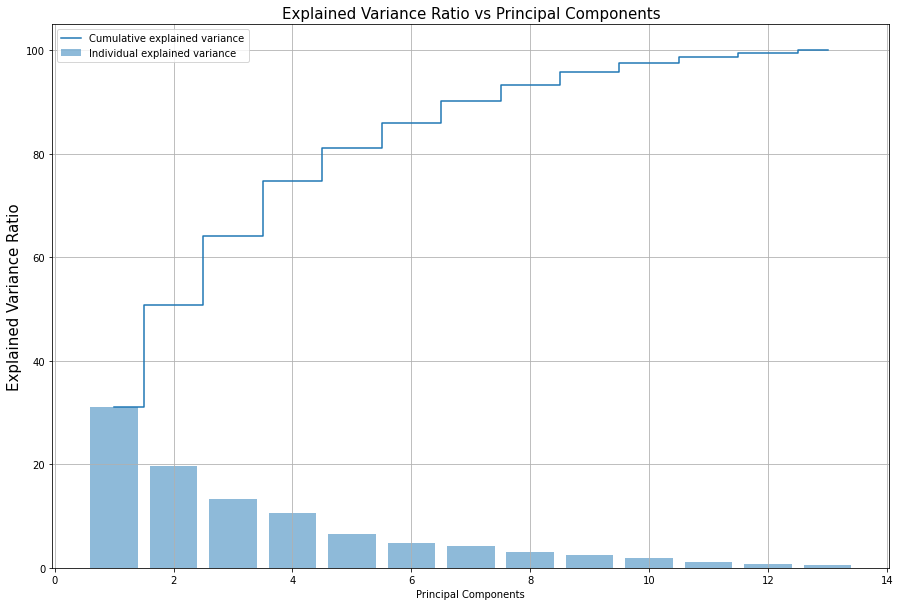

In [69]:
plt.figure(figsize=(15 ,10))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio',fontsize=15)
plt.xlabel('Principal Components',fontsize=10)
plt.title('Explained Variance Ratio vs Principal Components',fontsize=15)
plt.legend(loc = 'best')
plt.grid()
plt.show()

In [85]:
# Step 1- Create the covariance Matrix
cov_matrix = np.cov(df_num_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.01010101e+00  1.47246863e-01 -4.66398292e-02  3.21596548e-02
  -1.45780253e-01  7.38679326e-02 -4.91322907e-02  1.39879563e-02
  -6.36432983e-02  5.91842408e-02 -1.80153686e-01 -1.73872596e-01
   6.17605408e-02]
 [ 1.47246863e-01  1.01010101e+00 -1.38548704e-01  9.65661154e-02
   1.07444445e-01 -5.40132667e-02  4.82316579e-01 -1.53346338e-01
  -4.05335236e-01  8.92043497e-02  1.05356640e-01  2.79979825e-02
   4.91237372e-01]
 [-4.66398292e-02 -1.38548704e-01  1.01010101e+00  8.75544162e-04
   1.41595213e-01  4.34233041e-01 -5.32200387e-02  7.99539102e-01
   2.31780203e-01  5.24224157e-02  1.57724577e-01  1.93571786e-01
   2.85601025e-01]
 [ 3.21596548e-02  9.65661154e-02  8.75544162e-04  1.01010101e+00
   9.76329270e-02 -6.35051180e-02  1.94571168e-01  1.71621612e-02
  -2.73521901e-01  8.05220127e-01  8.09109340e-02  2.56976702e-02
   1.13734524e-01]
 [-1.45780253e-01  1.07444445e-01  1.41595213e-01  9.76329270e-02
   1.01010101e+00  1.98905906e-01  5.6708783

In [86]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('\n')
print('Eigen Vectors \n %s', eig_vecs)


 Eigen Values 
 %s [4.09031163 2.58246009 1.74408311 1.38449513 0.84530284 0.63737703
 0.55277881 0.40687424 0.32136047 0.23782883 0.14469341 0.08361313
 0.10013442]


Eigen Vectors 
 %s [[ 0.04659362  0.04983935 -0.23101384 -0.49737305 -0.77967247 -0.11581052
   0.2434289   0.00670863  0.10531516 -0.03330521  0.03642261  0.02144534
  -0.00261414]
 [-0.15527921  0.31871546  0.00350694 -0.52458938  0.30438026 -0.26205579
  -0.40025604  0.12242084  0.29399737 -0.18687338 -0.2077462   0.21495202
  -0.22775251]
 [-0.16649956 -0.43719256 -0.24857742 -0.08627072  0.30202119 -0.09075031
   0.4135531   0.0069788   0.51442042 -0.23131479 -0.02350541 -0.34920787
   0.02731935]
 [-0.12357735  0.24176757 -0.56970117  0.29368824 -0.01164363 -0.05256564
  -0.12809222 -0.01430496 -0.10903036 -0.53917654  0.42537132  0.11007793
   0.01723457]
 [-0.42372779 -0.00333435  0.21422033  0.17225577 -0.20503738 -0.05876359
   0.03792792 -0.00299504 -0.13815804 -0.44253679 -0.58002662  0.05228422
   0.3792746

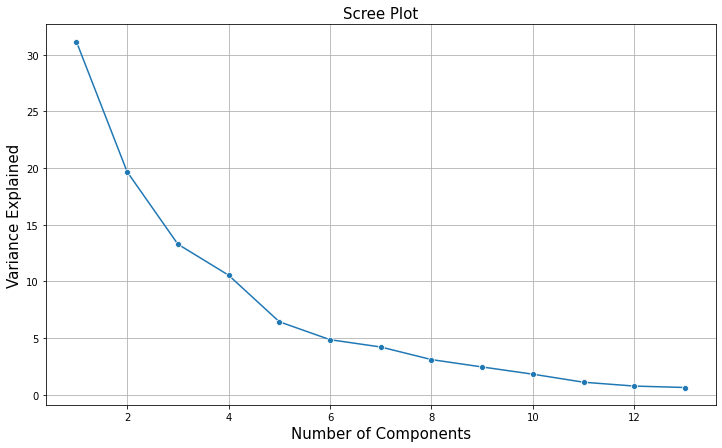

In [87]:
# Step 3 View Scree Plot to identify the number of components to be built
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()


In [ ]:
# Extract the required(as per the cumulative explained variance) number of PCs
pca = PCA(n_components=17, random_state=112)
pca_final

In [ ]:
# Create a dataframe out of fit_transformed scaled data above
pca_final_df = pd.df(pca_final, columns = df_extracted_loadings.columns)
pca_final_df.head(10)

# ***END***